In [ ]:
from google.colab import files
uploaded = files.upload()


# Install required libraries
!pip install pandas nltk

import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources
nltk.download('vader_lexicon')

# Load WhatsApp data
whatsapp_data_path = 'test.txt'
with open(whatsapp_data_path, 'r', encoding='utf-8') as file:
    whatsapp_messages = file.readlines()

# Preprocess data (remove special characters, stopwords, etc.)
# Example preprocessing steps:
# - Remove special characters
# - Convert text to lowercase
# - Tokenization

# Perform sentiment analysis using NLTK's SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

sentiments = []
for message in whatsapp_messages:
    sentiment_score = sia.polarity_scores(message)
    if sentiment_score['compound'] > 0.05:
        sentiment = 'positive'
    elif sentiment_score['compound'] < -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    sentiments.append(sentiment)

# Create a DataFrame with the messages and their sentiments
df = pd.DataFrame({'Message': whatsapp_messages, 'Sentiment': sentiments})

# Print the DataFrame
print(df)

Saving test.txt to test (2).txt
                                              Message Sentiment
0   1/18/24, 3:54 PM - Messages and calls are end-...  negative
1             1/18/24, 3:54 PM - Apeksha Shelar: Hi\n   neutral
2   1/18/24, 3:55 PM - Apeksha Shelar: Tuzyakade k...   neutral
3     1/18/24, 4:46 PM - Gholap Vaishnavi: Ho karte\n   neutral
4   1/18/24, 8:13 PM - Apeksha Shelar: Notes send ...   neutral
..                                                ...       ...
95  3/12/24, 9:51 AM - Gholap Vaishnavi: <Media om...   neutral
96  3/12/24, 9:53 AM - Gholap Vaishnavi: <Media om...   neutral
97  3/12/24, 9:54 AM - Gholap Vaishnavi: <Media om...   neutral
98     3/12/24, 11:52 AM - Apeksha Shelar: Thanks 🥰\n  positive
99  3/14/24, 10:21 AM - Apeksha Shelar: https://yo...   neutral

[100 rows x 2 columns]


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Repeated Words:
Apeksha       33
Shelar:       33
Vaishnavi:    27
Gholap        27
omitted>      10
<Media        10
Ok             8
:-             7
*              7
send           5
📚              5
ka             5
:-*            5
📒              5
kar            4
asel           4
na             4
tar            4
karte          4
🥰              4
Ho             3
Hi             3
pn             3
Ag             3
kade           3
Thanks         3
N&SM           2
*(3)           2
MTX            2
ahe            2
tula           2
DME            2
Tq             2
vichaarun      2
Links          2
Tu             2
🔗              2
➡️*            2
*(1)           2
Elective       2
...            2
Subject        2
MST            2
pahije         2
*(4)           2
book           2
*(2)           2
HMT            2
*(5)           2
nhi            2
asen           2
paper          2
to             2
question       2
insem          2
chi            2
kahi           2
sem            

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


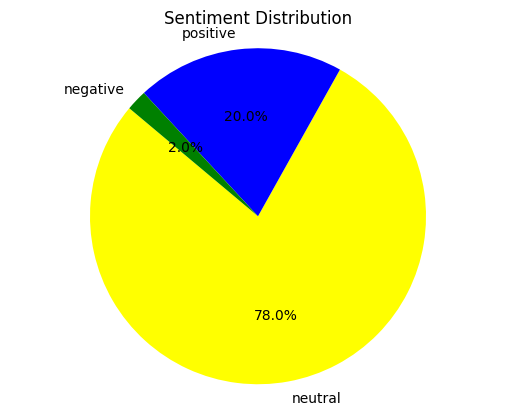


Sentiment Counts:
  Sentiment  Count
0   neutral     78
1  positive     20
2  negative      2


In [ ]:
import re
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Install required packages
!pip install pandas nltk matplotlib
nltk.download('vader_lexicon')

def clean_and_extract_messages(input_file_path, output_file_path):
    with open(input_file_path, 'r', encoding="utf-8") as input_file:
        with open(output_file_path, 'w', encoding="utf-8") as output_file:
            lines = input_file.readlines()
            for line in lines:
                if re.match(r'^\d+/\d+/\d+, \d+:\d+ [AP]M - ', line):
                    pass
                else:
                    clean_line = re.sub(r'^.*M - ', '', line)
                    output_file.write(clean_line)


def visualize_sentiment_distribution(sentiments):
    sentiment_counts = pd.Series(sentiments).value_counts()
    labels = sentiment_counts.index
    sizes = sentiment_counts.values
    colors = ['yellow', 'blue', 'green']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('Sentiment Distribution')
    plt.show()


def calculate_repeated_words(messages):
    words = ' '.join(messages).split()
    word_counts = pd.Series(words).value_counts()
    return word_counts[word_counts > 1]


def count_sentiment(sentiments):
    sentiment_counts = pd.Series(sentiments).value_counts()
    return sentiment_counts


def main():
    input_file_path = 'test.txt'
    output_file_path = 'clean.txt'
    clean_and_extract_messages(input_file_path, output_file_path)

    # Read cleaned messages
    with open(output_file_path, 'r', encoding='utf-8') as file:
        whatsapp_messages = file.readlines()

    # Sentiment analysis
    sia = SentimentIntensityAnalyzer()
    sentiments = []
    for message in whatsapp_messages:
        sentiment_score = sia.polarity_scores(message)
        if sentiment_score['compound'] > 0.05:
            sentiment = 'positive'
        elif sentiment_score['compound'] < -0.05:
            sentiment = 'negative'
        else:
            sentiment = 'neutral'
        sentiments.append(sentiment)

    # Calculate repeated words
    repeated_words = calculate_repeated_words(whatsapp_messages)
    print("Repeated Words:")
    print(repeated_words)

    # Create DataFrame for sentiment counts
    sentiment_counts = count_sentiment(sentiments)
    sentiment_df = pd.DataFrame({'Sentiment': sentiment_counts.index, 'Count': sentiment_counts.values})

    # Visualize sentiment distribution
    visualize_sentiment_distribution(sentiments)

    # Display sentiment counts
    print("\nSentiment Counts:")
    print(sentiment_df)


if __name__ == "__main__":
    main()